<a href="https://colab.research.google.com/github/PayalBarnwal03/Alfido-Tech/blob/master/Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Weather Data Analysis**

In [ ]:
#Importing Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
#Loading Dataset
df=pd.read_csv('/content/Weather Data.csv')
df=pd.DataFrame(df)
print(df)

             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa         

In [ ]:
df.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog

In [ ]:
df.describe()

Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000

In [ ]:
df.shape

(8784, 8)

In [ ]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
#Check the null values
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [ ]:
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [ ]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace = True)
df.duplicated().sum()

0

In [ ]:
df.size

70272

In [ ]:
pd.to_numeric(df['Date/Time'], errors='coerce')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8779   NaN
8780   NaN
8781   NaN
8782   NaN
8783   NaN
Name: Date/Time, Length: 8784, dtype: float64

In [ ]:
pd.to_numeric(df['Weather'], errors='coerce')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8779   NaN
8780   NaN
8781   NaN
8782   NaN
8783   NaN
Name: Weather, Length: 8784, dtype: float64

Finding out the covariance and correlation between the columns

In [ ]:
df.cov()

<ipython-input-85-4b6b3a7f99ce>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()
<ipython-input-85-4b6b3a7f99ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.932714  -0.220182        -0.061876   
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685   
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743   
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000   
Visibility_km     0.273455          0.050813  -0.633683         0.004883   
Press_kPa        -0.236389         -0.320616  -0.231424        -0.356613   

                  Visibility_km  Press_kPa  
Temp_C                 0.273455  -0.236389  
Dew Point Temp_C       0.050813  -0.320616  
Rel Hum_%             -0.633683  -0.231424  
Wind Speed_km/h        0.004883  -0.356613  
Visibility_km          1.000000   0.231847  
Press_kPa              0.231847   1.000000

from matplotlib import pyplot as plt
_df_0['Temp_C'].plot(kind='hist', bins=20, title='Temp_C')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Dew Point Temp_C'].plot(kind='hist', bins=20, title='Dew Point Temp_C')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rel Hum_%'].plot(kind='hist', bins=20, title='Rel Hum_%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Wind Speed_km/h'].plot(kind='hist', bins=20, title='Wind Speed_km/h')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Temp_C', y='Dew Point Temp_C', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Dew Point Temp_C', y='Rel Hum_%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Rel Hum_%', y='Wind Speed_km/h', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Wind Speed_km/h', y='Visibility_km', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Temp_C'].plot(kind='line', figsize=(8, 4), title='Temp_C')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Dew Point Temp_C'].plot(kind='line', figsize=(8, 4), title='Dew Point Temp_C')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Rel Hum_%'].plot(kind='line', figsize=(8, 4), title='Rel Hum_%')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Wind Speed_km/h'].plot(kind='line', figsize=(8, 4), title='Wind Speed_km/h')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Temp_C', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Dew Point Temp_C', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Rel Hum_%', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Wind Speed_km/h', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.corr()

<ipython-input-86-ecd6111b5afd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-86-ecd6111b5afd>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


Temp_C  Dew Point Temp_C   Rel Hum_%  Wind Speed_km/h  \
Temp_C            136.606604        118.641308  -43.540073        -6.283660   
Dew Point Temp_C  118.641308        118.441263   25.684917        -9.047958   
Rel Hum_%         -43.540073         25.684917  286.248550       -13.633521   
Wind Speed_km/h    -6.283660         -9.047958  -13.633521        75.493440   
Visibility_km      40.343485          6.980371 -135.330500         0.535508   
Press_kPa          -2.331894         -2.944971   -3.304649        -2.615151   

                  Visibility_km  Press_kPa  
Temp_C                40.343485  -2.331894  
Dew Point Temp_C       6.980371  -2.944971  
Rel Hum_%           -135.330500  -3.304649  
Wind Speed_km/h        0.535508  -2.615151  
Visibility_km        159.332259   2.470011  
Press_kPa              2.470011   0.712344

from matplotlib import pyplot as plt
_df_17['Temp_C'].plot(kind='hist', bins=20, title='Temp_C')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Dew Point Temp_C'].plot(kind='hist', bins=20, title='Dew Point Temp_C')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Rel Hum_%'].plot(kind='hist', bins=20, title='Rel Hum_%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Wind Speed_km/h'].plot(kind='hist', bins=20, title='Wind Speed_km/h')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Temp_C', y='Dew Point Temp_C', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Dew Point Temp_C', y='Rel Hum_%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Rel Hum_%', y='Wind Speed_km/h', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='Wind Speed_km/h', y='Visibility_km', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Temp_C'].plot(kind='line', figsize=(8, 4), title='Temp_C')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Dew Point Temp_C'].plot(kind='line', figsize=(8, 4), title='Dew Point Temp_C')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Rel Hum_%'].plot(kind='line', figsize=(8, 4), title='Rel Hum_%')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Wind Speed_km/h'].plot(kind='line', figsize=(8, 4), title='Wind Speed_km/h')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df['Rel Hum_%'].mean()

67.43169398907104

In [ ]:
df['Press_kPa'].std()

0.8440047459486483

In [ ]:
df['Weather'].min()

'Clear'

In [ ]:
df['Temp_C'].min()

-23.3

<Axes: xlabel='Visibility_km', ylabel='count'>

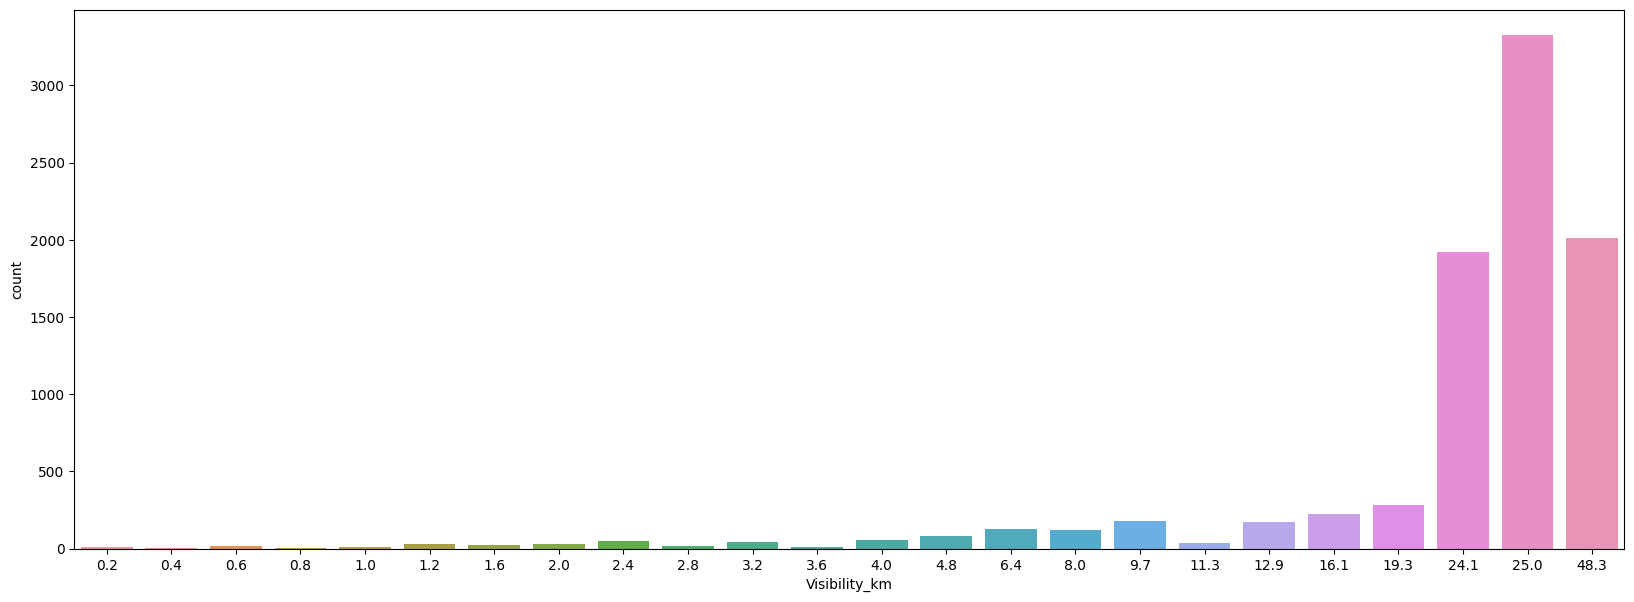

In [ ]:
f=plt.figure()
f.set_figheight(7)
f.set_figwidth(20)
sns.countplot(x="Visibility_km", data=df)

<ipython-input-14-a655709e5250>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

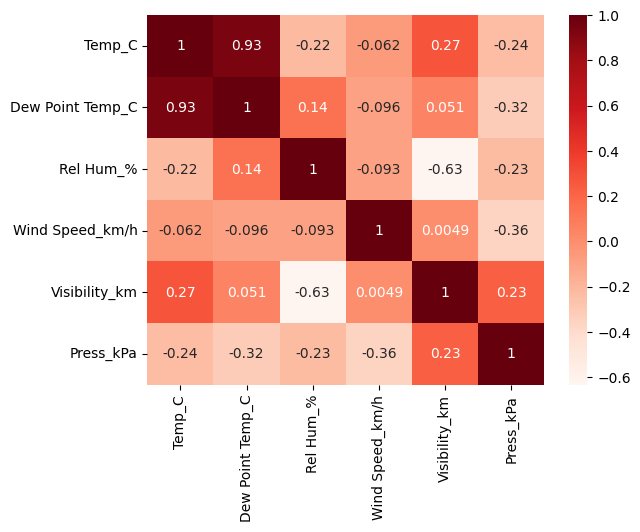

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='Reds')

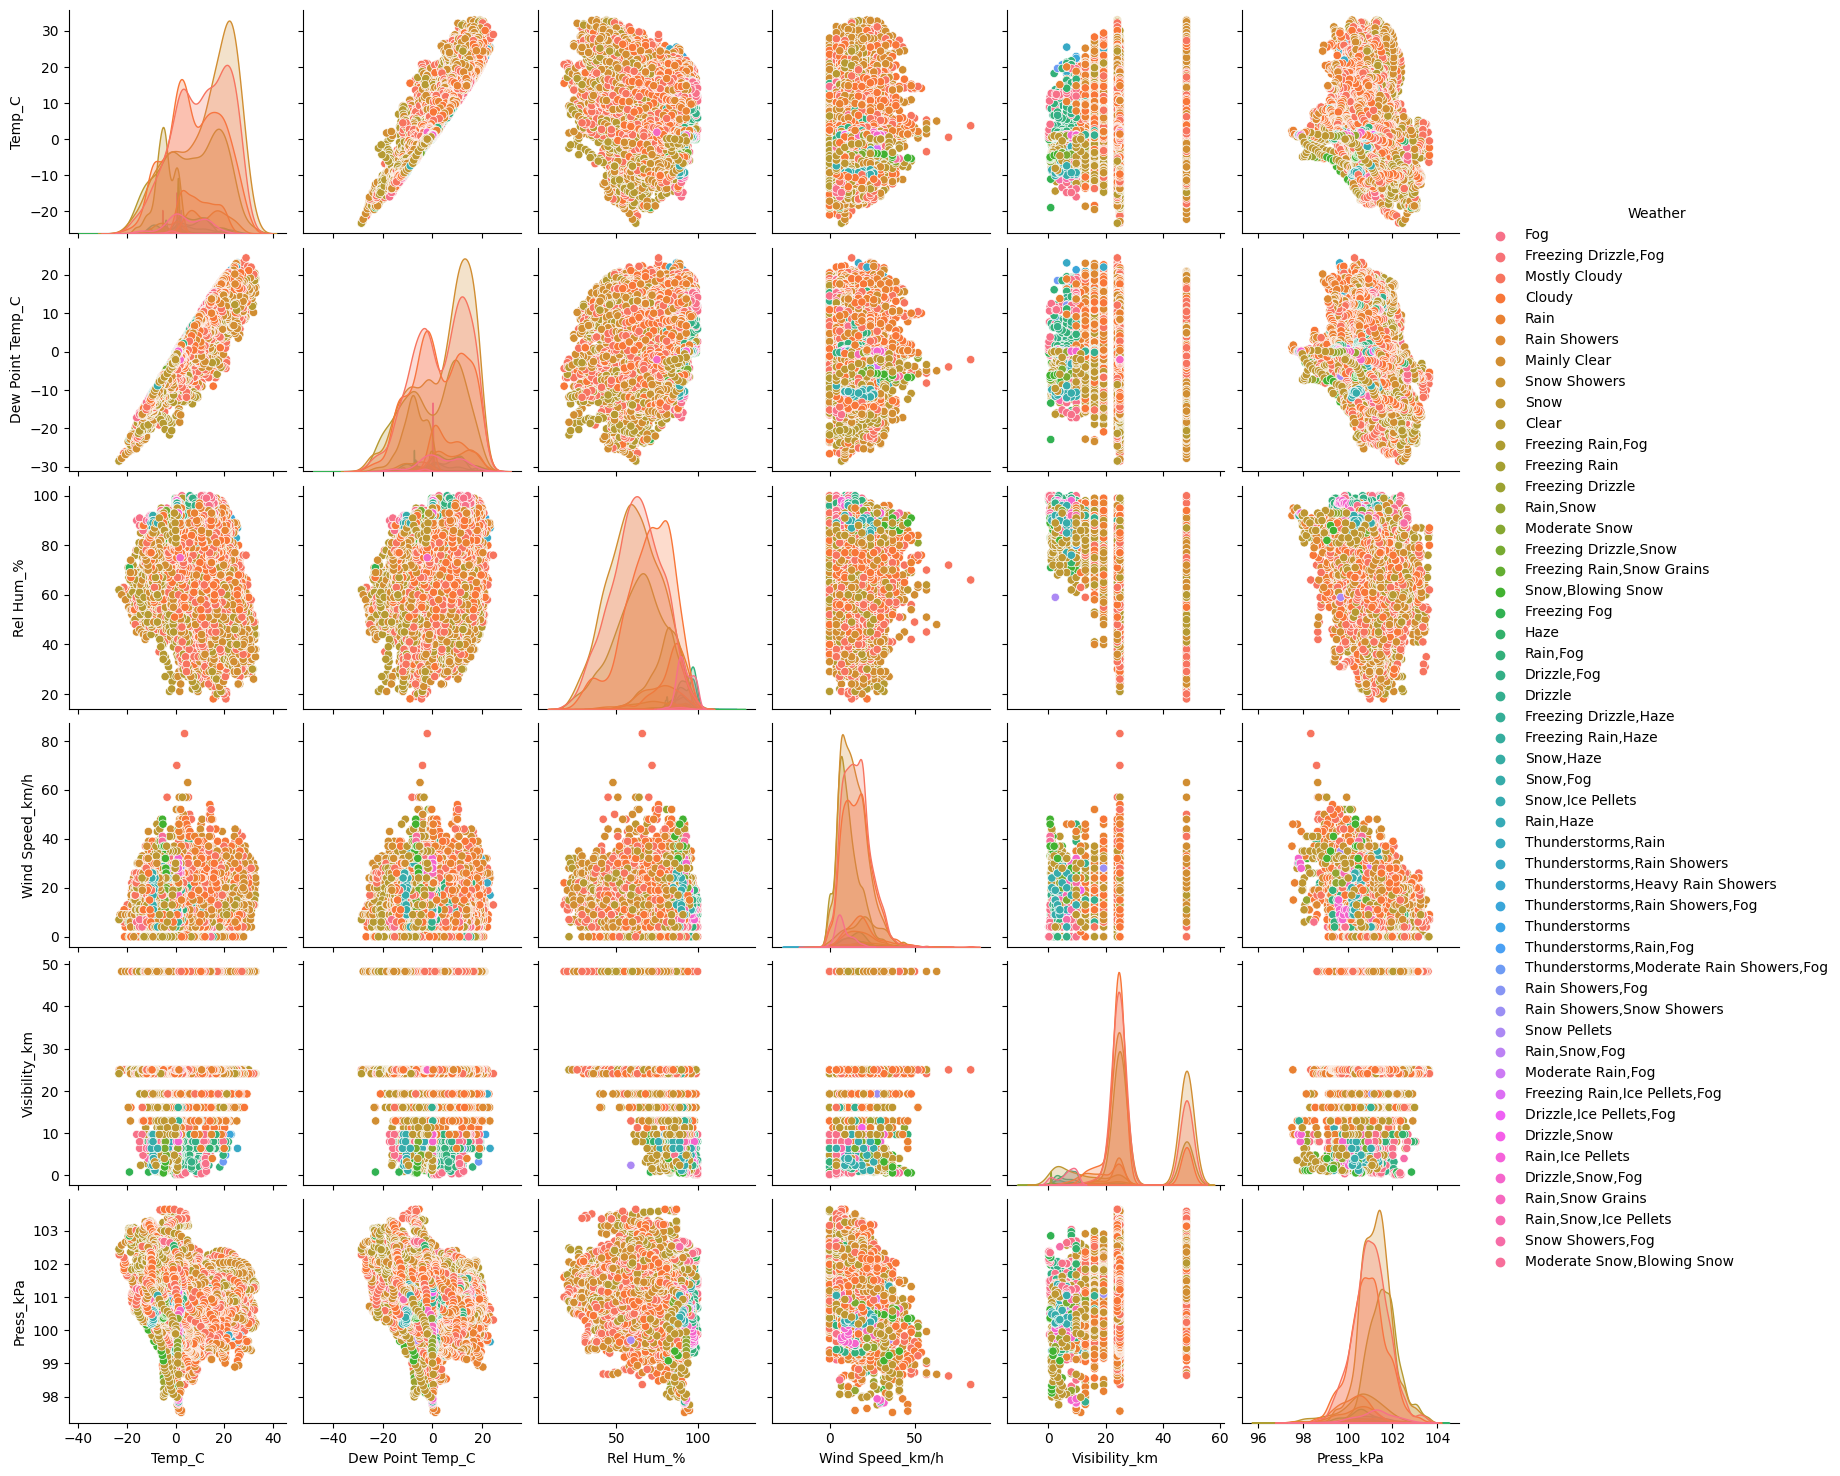

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='Weather')

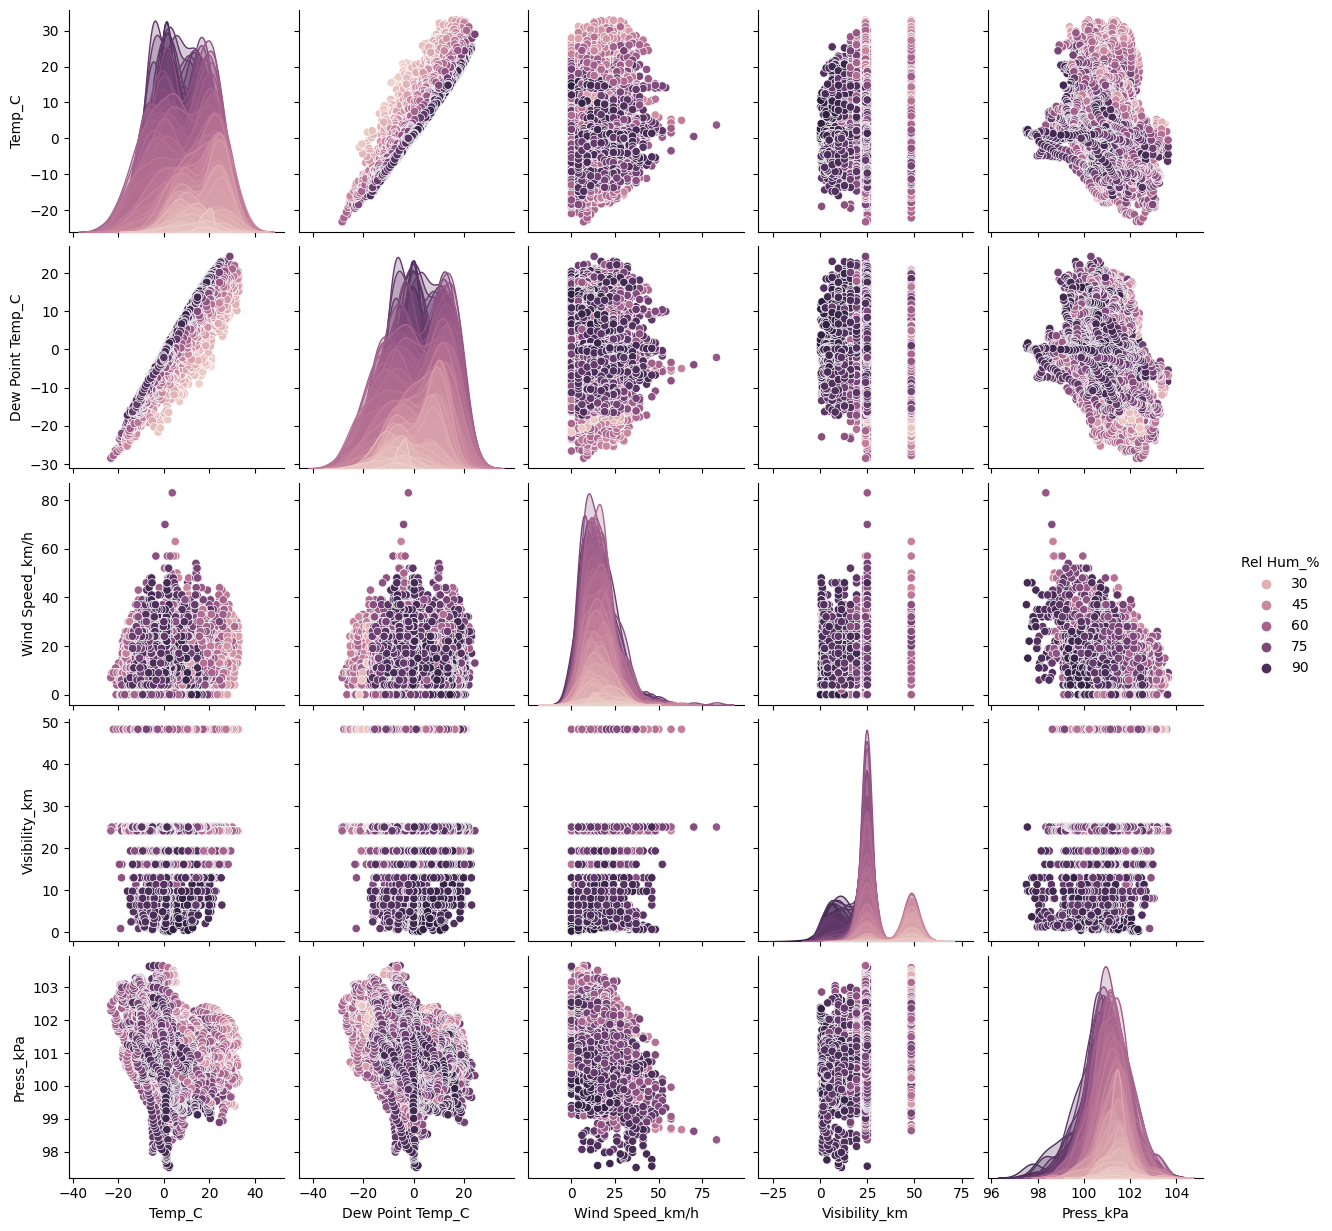

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='Rel Hum_%')

In [ ]:
df['Wind Speed_km/h'].value_counts()

9     830
11    791
13    735
15    719
7     677
17    666
19    616
6     609
20    496
4     474
22    439
24    374
0     309
26    242
28    205
30    161
32    139
33     85
35     53
37     45
39     24
41     22
44     14
43     13
48     13
46     11
52      7
57      5
50      4
2       2
83      1
70      1
63      1
54      1
Name: Wind Speed_km/h, dtype: int64

<Axes: xlabel='Wind Speed_km/h', ylabel='count'>

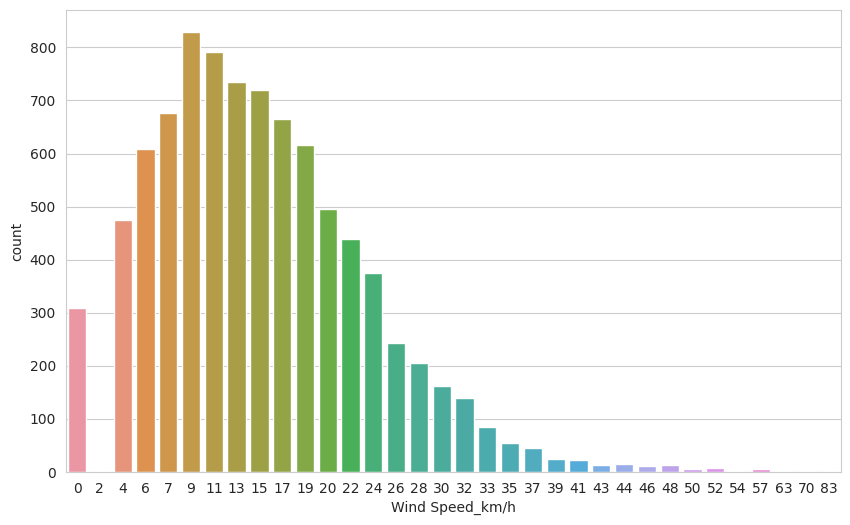

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Wind Speed_km/h'])

In [ ]:
df['Visibility_km'].value_counts()

25.0    3324
48.3    2014
24.1    1921
19.3     281
16.1     224
9.7      181
12.9     174
6.4      129
8.0      122
4.8       79
4.0       55
2.4       50
3.2       42
11.3      36
1.2       28
2.0       28
1.6       25
0.6       16
2.8       15
1.0       11
3.6       11
0.2        8
0.8        7
0.4        3
Name: Visibility_km, dtype: int64

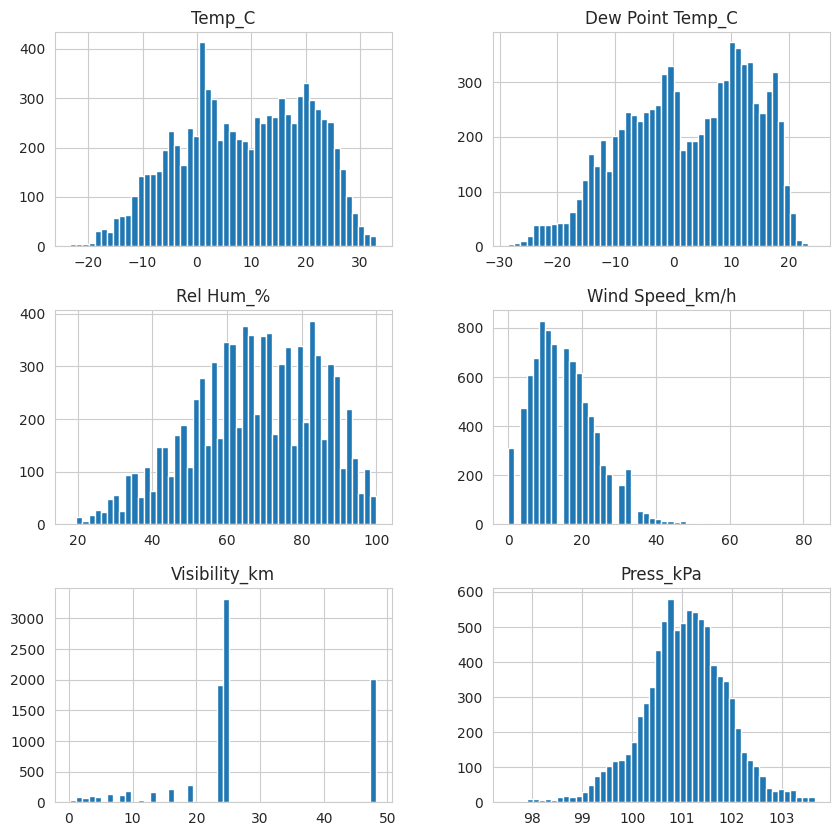

In [ ]:
df.hist(figsize=(10,10),bins=50)
plt.show()

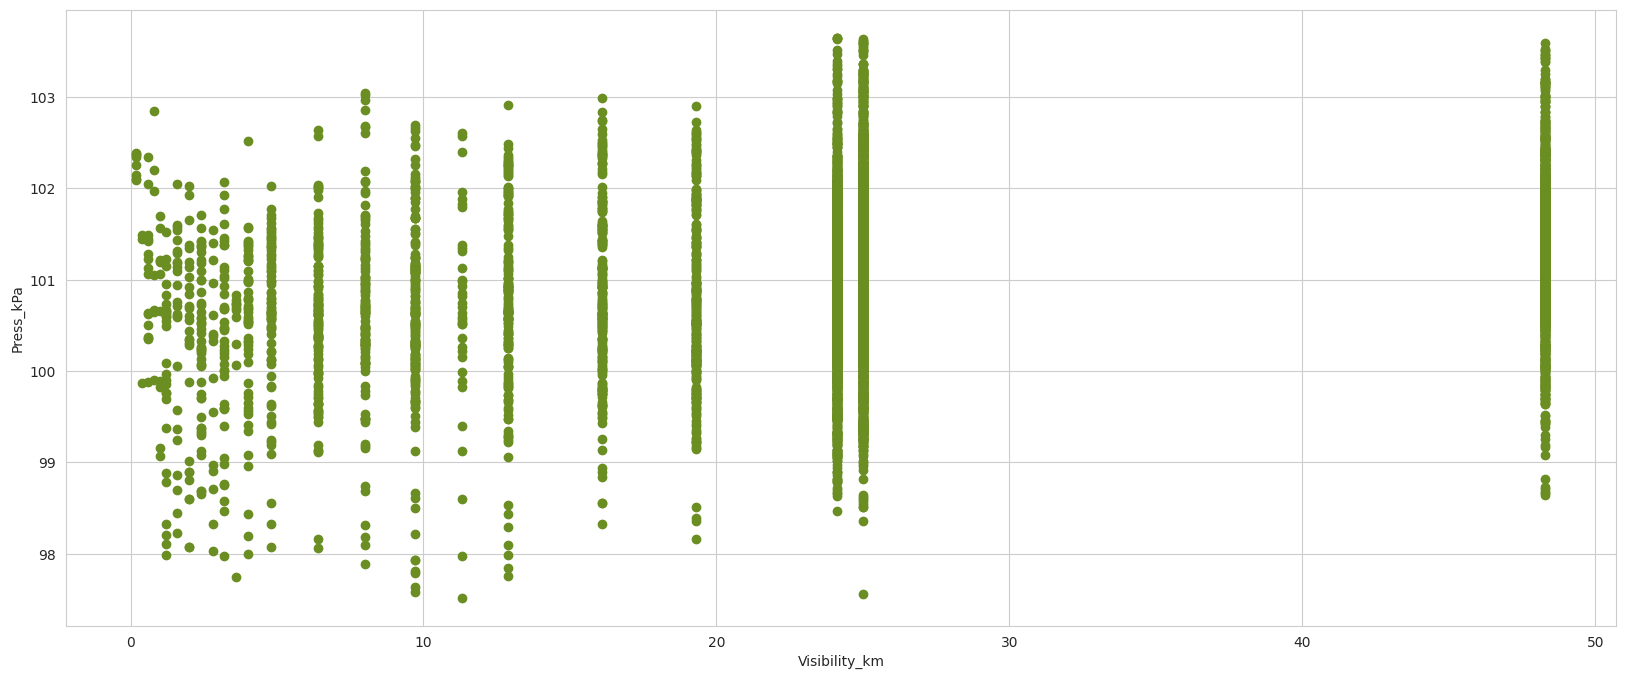

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(df['Visibility_km'],df['Press_kPa'],color='olivedrab')
ax.set_xlabel('Visibility_km')
ax.set_ylabel('Press_kPa')
plt.show()

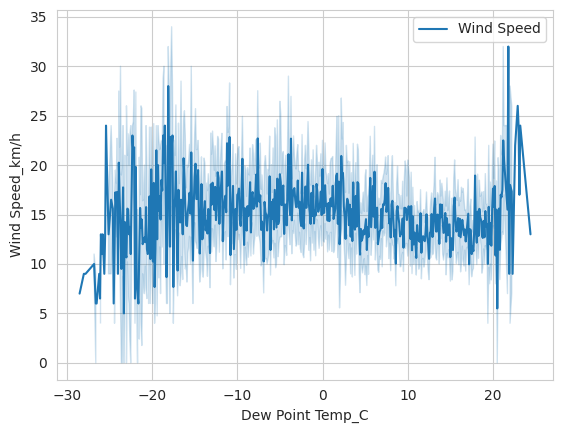

In [ ]:
sns.lineplot(x='Dew Point Temp_C',y='Wind Speed_km/h',label='Wind Speed',data=df)
plt.legend()
plt.show()

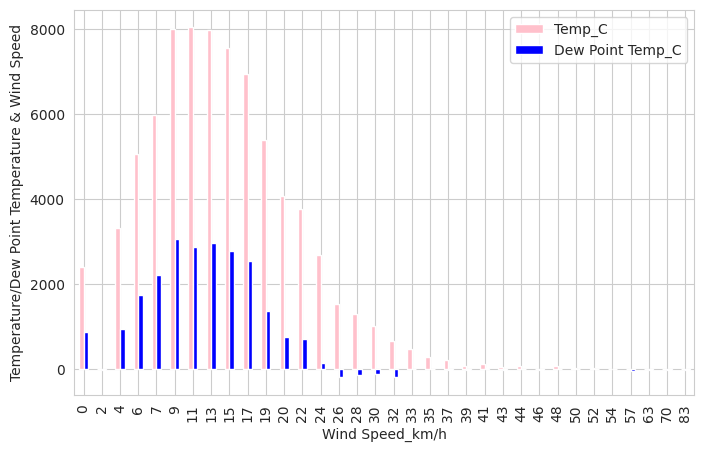

In [ ]:
df.groupby('Wind Speed_km/h')[['Temp_C','Dew Point Temp_C']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Temperature/Dew Point Temperature & Wind Speed')
plt.show()

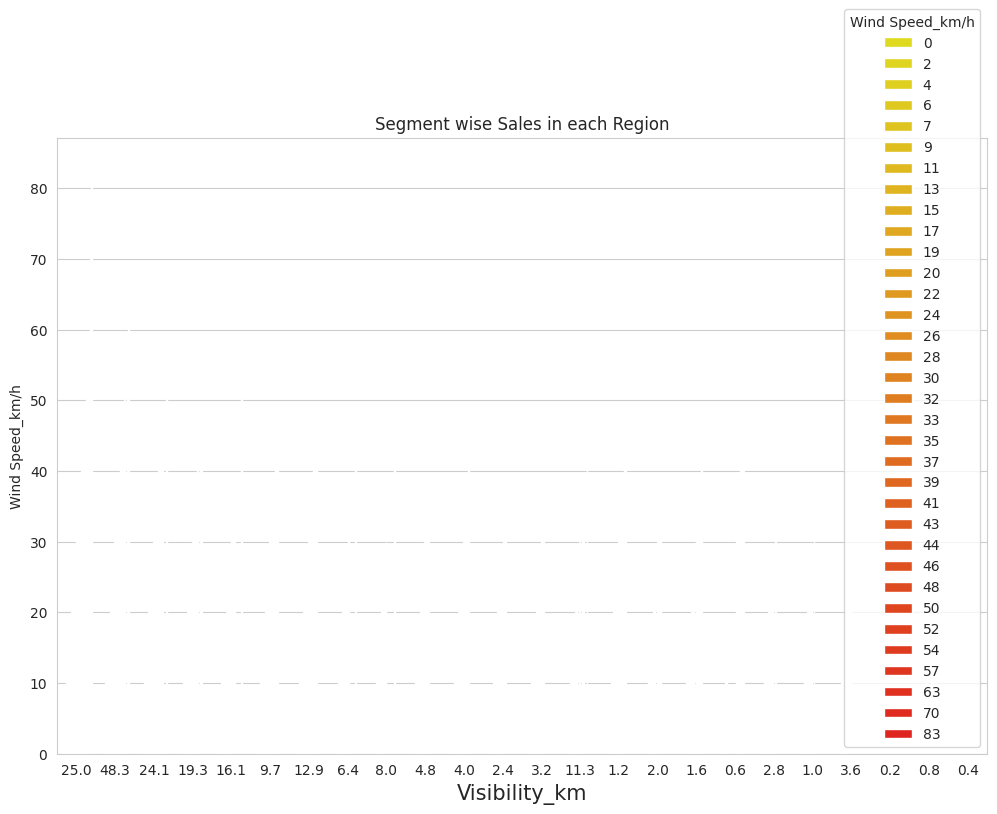

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='Visibility_km',y='Wind Speed_km/h',data=df,hue='Wind Speed_km/h',order=df['Visibility_km'].value_counts().index,palette='autumn_r')
plt.xlabel('Visibility_km',fontsize=15)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder=OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column
encoder_df=pd.DataFrame(encoder.fit_transform(df[['Weather']]).toarray())

#merge one-hot encoded columns back with original DataFrame
#final_df=df[['Weather']].join(encoder_df)

#view final_df
print(encoder_df)

       0    1    2    3    4    5    6    7    8    9   ...   40   41   42  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8779  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8780  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8781  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8782  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8783  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       43   44   45   46   47   48   49  
0     0.0  0.0  0.0  